In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
d_train = pd.read_csv('../input/mobile-price-classification/train.csv')
d_test = pd.read_csv('../input/mobile-price-classification/test.csv')

df_train = d_train.copy()
df_test = d_test.copy()

In [3]:
display(df_train)
display(df_test)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [6]:
X = df_train.iloc[:,:-1]
y = df_train['price_range']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression Model

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.96      0.99      0.97        91
           2       0.99      0.93      0.96        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



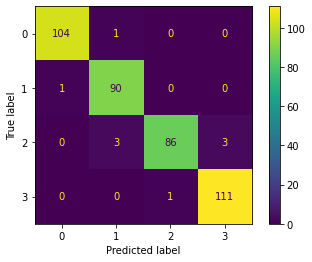

In [10]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

y_pred = lr.predict(X_test)

plot_confusion_matrix(lr, X_test, y_test)

print(classification_report(y_test,y_pred))

## Optimal Component Number with PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA()

In [15]:
pca = PCA(n_components = 2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

sum(pca.explained_variance_ratio_)

0.21397472968536607

In [17]:
pca = PCA(n_components = 13)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

sum(pca.explained_variance_ratio_)

0.7946986528710701

In [18]:
pca = PCA(n_components = 14)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

sum(pca.explained_variance_ratio_)

0.8330159366677276

- if it can explain the variance over 80 percent, this is an acceptable rate

In [19]:
pd.DataFrame(data = X_train_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.379686,0.668007,-0.211840,-0.113225,-0.054303,-0.158250,1.106907,0.389883,0.092434,0.668007,0.963254,-0.480647,0.699350,-0.040636
1,-1.078292,-0.657949,-0.244822,0.846260,0.305810,0.058634,-1.046993,-0.305894,-0.902669,-0.318289,-0.632871,-0.109328,0.805175,-0.060952
2,-0.087684,-0.028032,0.942980,0.125221,-0.142871,-0.078065,1.284818,0.394880,-0.822127,-0.770678,0.317895,-0.269383,0.194117,-1.032212
3,-0.476783,0.089601,0.324029,0.245706,1.471700,-0.353878,-0.076832,0.230973,-0.069662,0.170157,0.843023,0.762733,0.351217,-0.064782
4,0.571140,-0.177920,-0.690406,-0.327945,-0.300651,0.309281,-0.369681,0.105630,0.737397,-0.904050,0.343701,-0.761288,-0.234817,-0.486273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.193846,0.409990,-0.375305,0.267289,0.538491,1.069976,0.842850,0.905155,0.741194,-0.221691,-0.050360,-0.460106,-0.153471,-0.448932
1596,-0.979562,0.941579,0.431121,-0.400369,-0.345311,-0.332870,-0.621176,-0.918301,-1.406094,0.064220,0.725881,-0.201282,0.367932,0.405622
1597,-0.755004,0.547527,0.671969,-0.073663,-0.696546,-0.015778,-0.132556,0.916518,0.149029,-0.053149,0.654727,-0.145115,0.156800,-0.011905
1598,-0.054510,0.487370,0.615290,-0.563629,0.519883,0.571136,-0.829633,1.421128,0.467805,-0.351322,0.459427,-0.320065,0.575518,-0.503486


## Logistic Regression after PCA

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_pca, y_train)

LogisticRegression(random_state=42)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.92      0.95      0.93        91
           2       0.93      0.92      0.93        92
           3       0.96      0.96      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



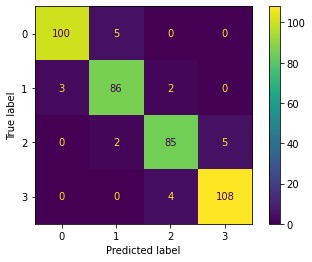

In [21]:
y_pred=lr.predict(X_test_pca)

from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(lr, X_test_pca, y_test)
print(classification_report(y_test,y_pred))

## Comment
- We trained Logistic Regression model. We got 0.98 accuracy score with logistic regression.
- After applying PCA(Principal Component Analysis) with n_component=14, we could explain over 80% of the variance in data. With the help of PCA, we decreased the dimension of data from 20 to 14 and we retrained a model with the logistic regression algorithm and the dataset that was reduced dimension. This time, we got was 0.95 accuracy score.